In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
filename = 'adult.data'
col_Names  = ["age", "workclass", "fnlwgt", "education","education-num","marital-status"
                ,"occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
df_origin = pd.read_csv(filename,  header=None, names = col_Names, delimiter = ", ")

In [3]:
to_remove = df_origin.apply(lambda row: row.str.contains('\?').any(), axis=1)
df_origin = df_origin.drop(index=df_origin[to_remove].index)
df = df_origin.copy()

In [4]:
df.shape

(30162, 15)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df_origin.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.describe(include=['O'])


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30162,30162,30162,30162,30162,30162,30162,30162,30162
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22286,9840,14065,4038,12463,25933,20380,27504,22654


 Native-country has maximum number of unique categories i.e. 41 categories.
 But the native-country is highly biased toward the US which has frequency of 27504 out of total 30162(nearly 91%).

## Race is also biased to the white race category(25933) with 86.0%.
## The top category in workclass is Private having frequency(36705) and percentage(74.0%).

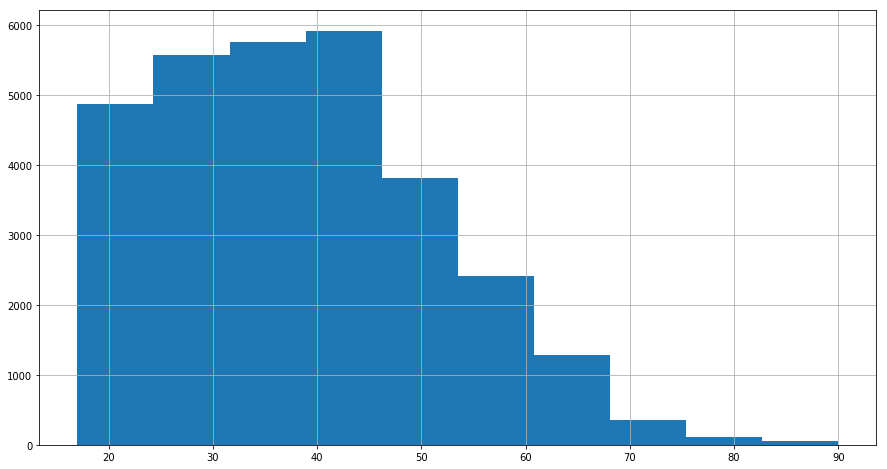

In [8]:
df['age'].hist(figsize=(15,8))
plt.show()

## The above histogram shows that :

"age" attribute is not symmetric.
it is right-skewed(But this is totally fine as younger adult earn wages not the older ones)
Minimum and Maximum age of the people is 17 and 90 respectively.

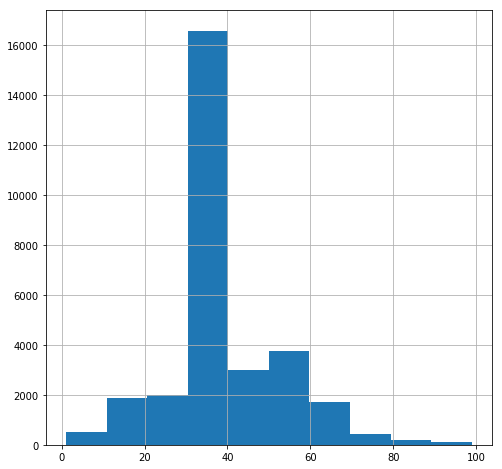

17571

In [9]:
df['hours-per-week'].hist(figsize=(8,8))
plt.show()
len(df[(df['hours-per-week']>=30) & (df['hours-per-week']<=40)])

## This histogram of "hours-per-week" shows that:

In this data the hours per week atrribute varies within the range of 1 to 99.
Most people work 30-40 hours per week, they are  17571 people.
There are also few people who works 80-100 hours per week and some less than 20 which is unusual.

## capital-gain

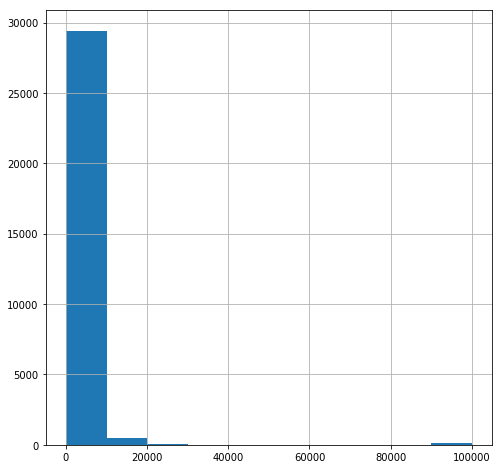

In [10]:
## Distribution
df["capital-gain"].hist(figsize=(8,8))
plt.show()

## This histogram shows that 
most of the "capital-gain" values are centered on 0 and few on 10k and 99k.
capital-gain is concentrated on the one particular value.
capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

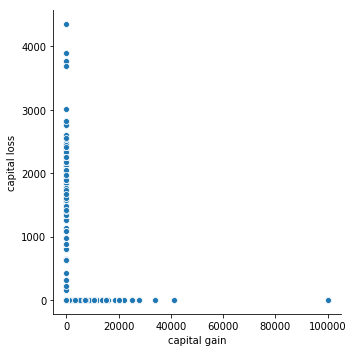

In [11]:
sns.relplot('capital-gain','capital-loss', data= df)
plt.xlabel("capital gain")
plt.ylabel("capital loss")
plt.show()

Possibilities for capital gain and capital loss

Both capital gain and capital loss can be zero
If capital.gain is zero there is possibility of capital loss being high or above zero.
If capital loss is zero there is possibility of capital.gain being high or above zero.

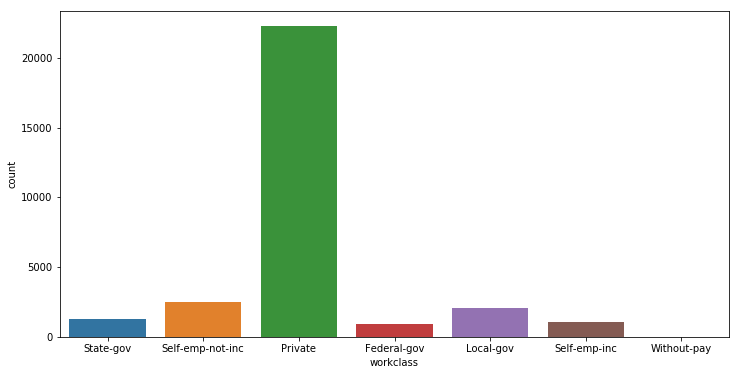

In [12]:

# Plotting count plot for categorical values
categorical_attributes = df.select_dtypes(include=['object'])

# Work-class Count plot
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "workclass")


We can see that most of the people work in private sectors, and the rest are evenly distributed among state-gov, federal-gov, local-gov, self-emp-inc and self-emp-not-inc.

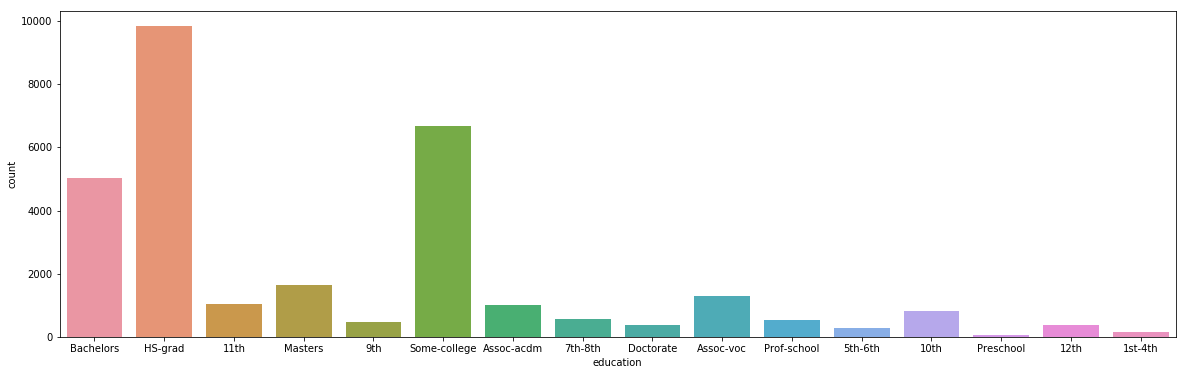

In [13]:
plt.figure(figsize=(20,6))
sns.countplot(data = categorical_attributes, x = "education")

Most of the people are high-school grads or have studied in some college. This is same as the education-num attribute, just that each of these values have been assigned a number there. We can use one of the two columns for our model, and ignore the other

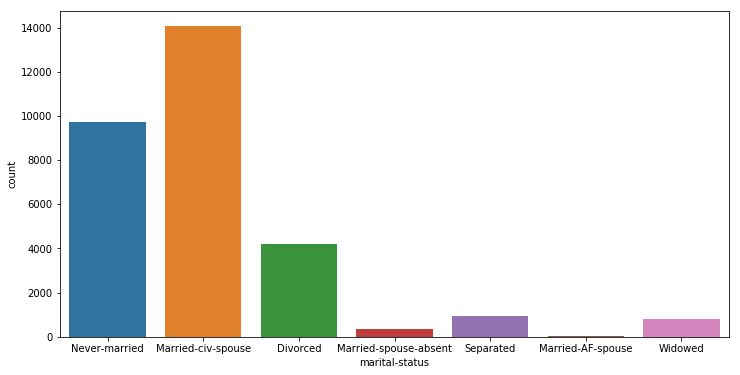

In [14]:
# Marital-Status Count plot
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "marital-status")


Most of the people are either married civilians or are never married.

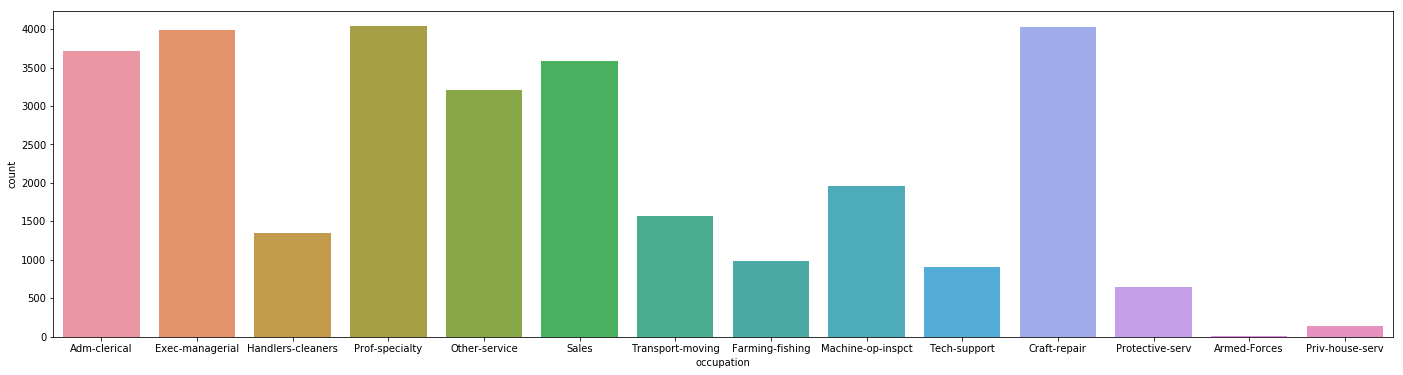

In [15]:
# Occupation Count plot
plt.figure(figsize=(24,6))
sns.countplot(data = categorical_attributes, x = "occupation")


The jobs/occupation of the individuals are evenly distributed among a lot of values, like clerical administrator, executive managerial posts, professional speciality, sales, craft-repair and other-services.

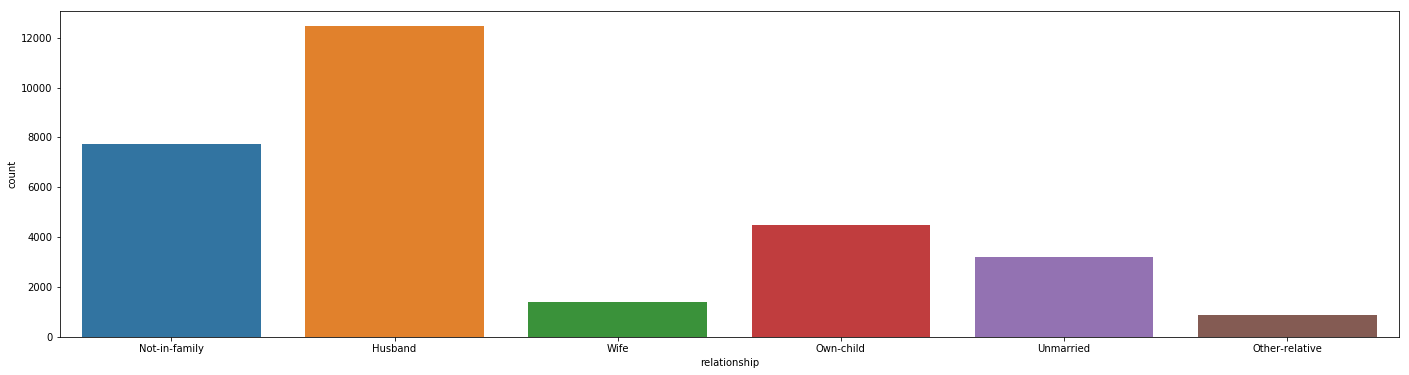

In [16]:
# Relationship Count plot
plt.figure(figsize=(24,6))
sns.countplot(data = categorical_attributes, x = "relationship")

Most of the people in the survey are husbands

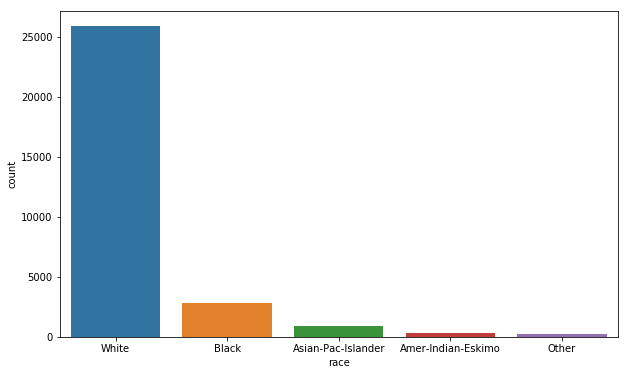

In [17]:
# Race Count plot
plt.figure(figsize=(10,6))
sns.countplot(data = categorical_attributes, x = "race")

There's a huge number of white people in the data, while there are considerable amount of black people. The others are in very few numbers.

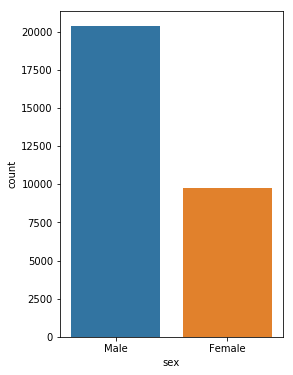

In [18]:
# Sex Count plot
plt.figure(figsize=(4,6))
sns.countplot(data = categorical_attributes, x = "sex")

Majority of the population in the data are Male

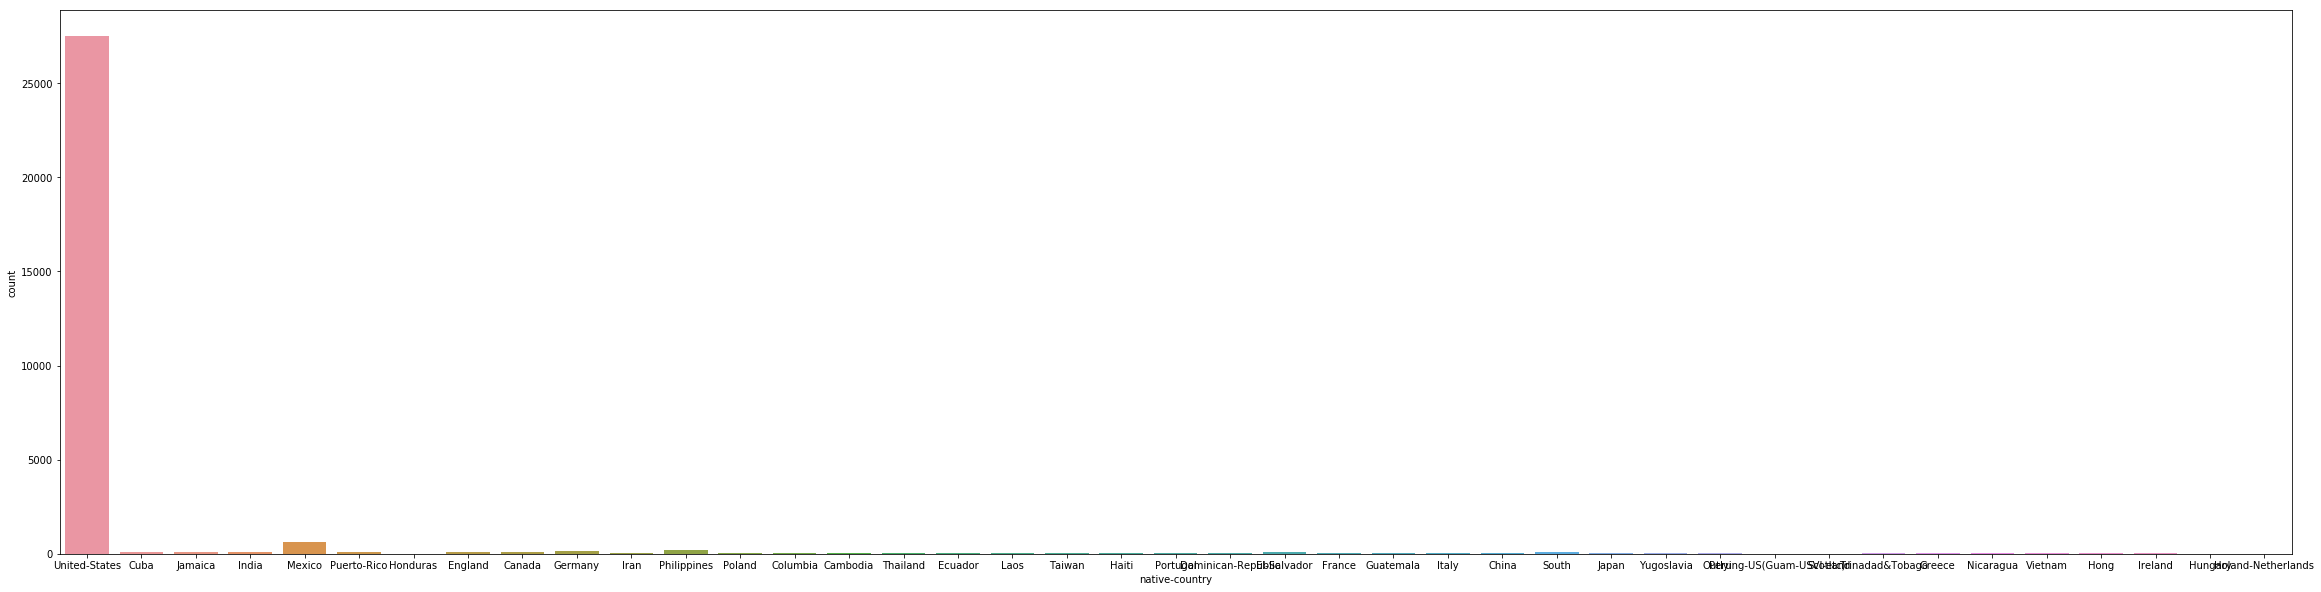

In [19]:
# Native-Country Count plot
plt.figure(figsize=(40,10))
sns.countplot(data = categorical_attributes, x = "native-country")

Majority of the people are from United States

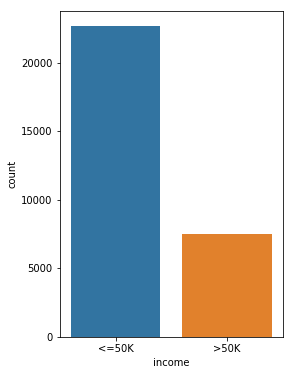

In [20]:
# Income Count plot
plt.figure(figsize=(4,6))
sns.countplot(data = categorical_attributes, x = "income")

Majority of the people have an income of less than 50k according to the data given, indicating that the data is somewhat skewed.

## Data Relationships

Text(0.5, 1.05, 'Pearson Correlation of Features')

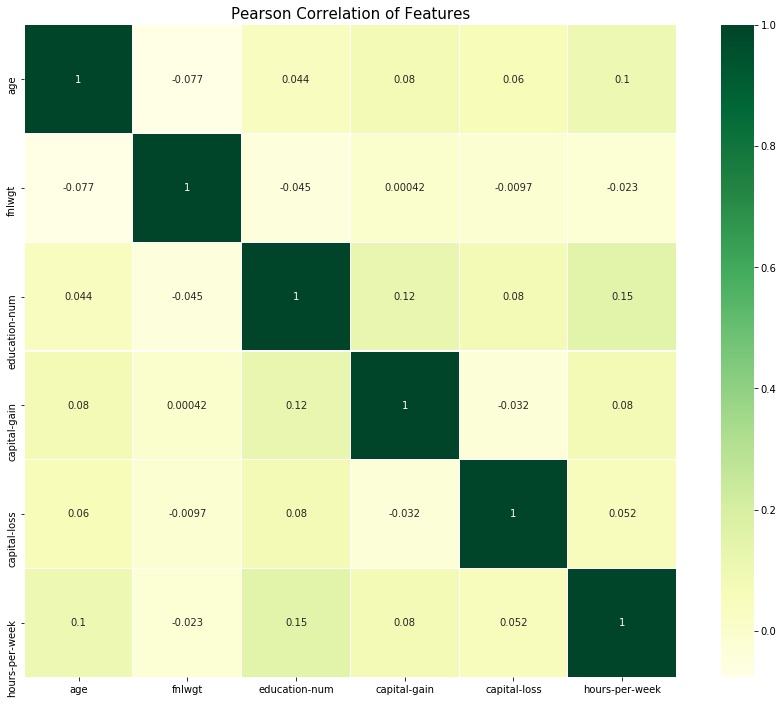

In [21]:
# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)

plt.title('Pearson Correlation of Features', y=1.05, size=15)


There isn't a great correlation between the numerical features.

The fnlwgt feature looks useless.
There is some correlation between age, hours per week and education-num according to both pair plot and correlation heatmap.
Capital gain and Capital loss don't anticorrelate a lot, which says people can invest only if they have money.

In [22]:
# Cross tabulation between work-class and sex
pd.crosstab(df['workclass'],df['sex'], margins=True)

sex,Female,Male,All
workclass,,,
Federal-gov,309,634,943
Local-gov,824,1243,2067
Private,7642,14644,22286
Self-emp-inc,126,948,1074
Self-emp-not-inc,392,2107,2499
State-gov,484,795,1279
Without-pay,5,9,14
All,9782,20380,30162


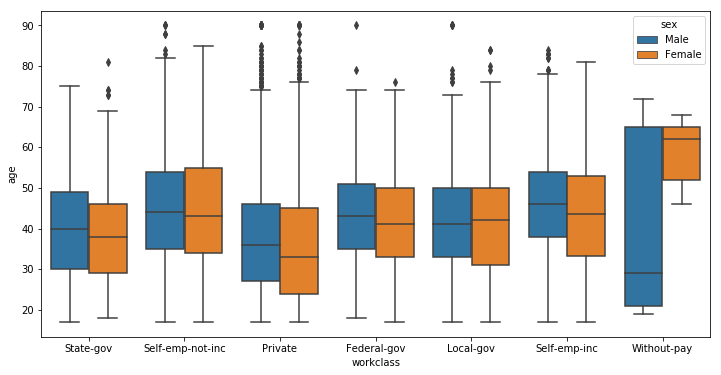

In [23]:
# Box plot between work-class and age for different sex
plt.figure(figsize=(12,6))
sns.boxplot(x="workclass",y="age", hue="sex", data=df)

The cross tabulation values show that more number of men are self employed rather than women. The box plot gives a few interesting observations:

People who have never worked have a very young age. Women have a slightly higher median age than men for this working-class.

Men who work without pay have a median age of around 25-30, whereas women who work without pay have a median age of around 60-65.

Most of the working class have a median age of around 40-50.

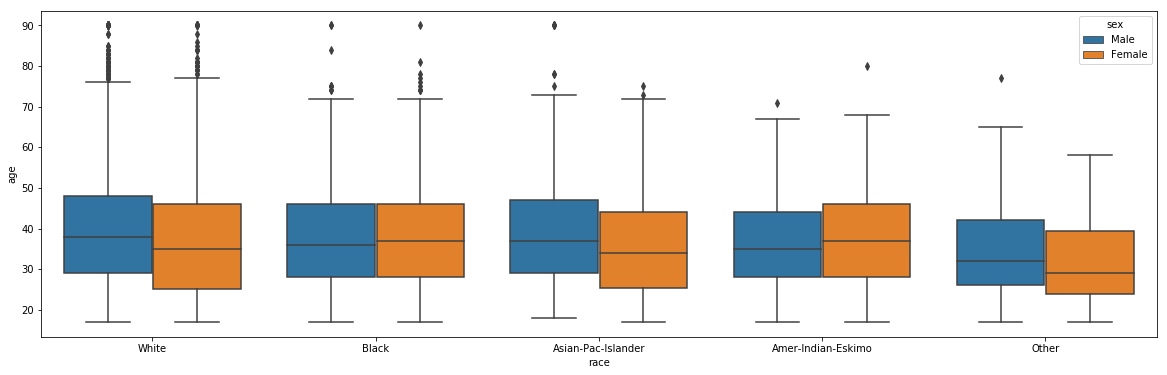

In [24]:
# Box plot between race and age for different sex
plt.figure(figsize=(20,6))
sns.boxplot(x="race",y="age", hue="sex", data=df)

People from "other" race have a younger median age than the rest of the races.

In [25]:
# Cross tabulation between native-country and sex
pd.crosstab(df['native-country'],df['sex'], margins=True)

sex,Female,Male,All
native-country,,,
Cambodia,2,16,18
Canada,34,73,107
China,18,50,68
Columbia,23,33,56
Cuba,38,54,92
Dominican-Republic,34,33,67
Ecuador,9,18,27
El-Salvador,33,67,100
England,30,56,86



We can see that the cross tabulation values don't give much interesting results when the number of categories are huge. We could reduce/combine the categories, like native-country to Non-USA, USA, group ages to specific ranges, etc.

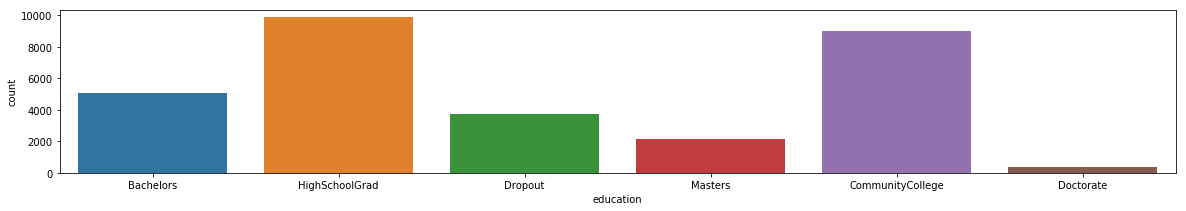

In [26]:
#Grouping education

df['education'].replace('Preschool', 'Dropout',inplace=True)
df['education'].replace('10th', 'Dropout',inplace=True)
df['education'].replace('11th', 'Dropout',inplace=True)
df['education'].replace('12th', 'Dropout',inplace=True)
df['education'].replace('1st-4th', 'Dropout',inplace=True)
df['education'].replace('5th-6th', 'Dropout',inplace=True)
df['education'].replace('7th-8th', 'Dropout',inplace=True)
df['education'].replace('9th', 'Dropout',inplace=True)
df['education'].replace('HS-Grad', 'HighSchoolGrad',inplace=True)
df['education'].replace('HS-grad', 'HighSchoolGrad',inplace=True)
df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
df['education'].replace('Prof-school', 'Masters',inplace=True)

fig = plt.figure(figsize=(20,3))
sns.countplot(x="education", data=df)

In [27]:
# Cross tabulation between native-country and sex
pd.crosstab(df['education'],df['income'], margins=True)

income,<=50K,>50K,All
education,,,
Bachelors,2918,2126,5044
CommunityCollege,7057,1936,8993
Doctorate,95,280,375
Dropout,3516,225,3741
HighSchoolGrad,8223,1617,9840
Masters,845,1324,2169
All,22654,7508,30162


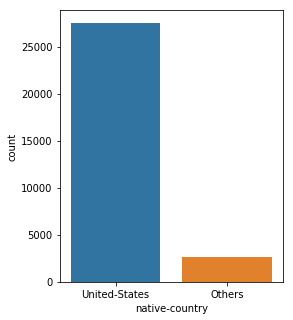

In [28]:
# Grouping native-country
df['native-country'] = df['native-country'].apply(lambda el: "United-States" if el == "United-States" else "Others")

# Plotting count plot for native-country
fig = plt.figure(figsize=(4,5))
sns.countplot(x="native-country", data=df)

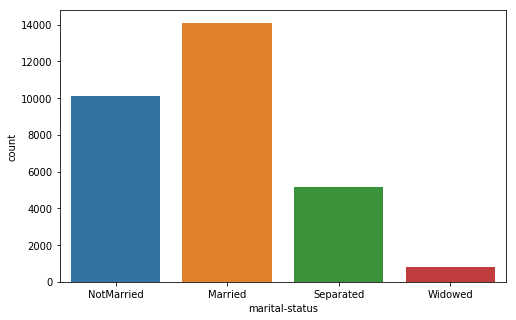

In [29]:
# Grouping marital status
df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

#Plotting count plot for marital status
fig = plt.figure(figsize=(8,5))
sns.countplot(x="marital-status", data=df)

In [30]:
# Plotting cross tabulation values for marital status and sex
pd.crosstab(df['marital-status'],df['sex'], margins=True)

sex,Female,Male,All
marital-status,,,
Married,1492,12594,14086
NotMarried,4501,5595,10096
Separated,3103,2050,5153
Widowed,686,141,827
All,9782,20380,30162


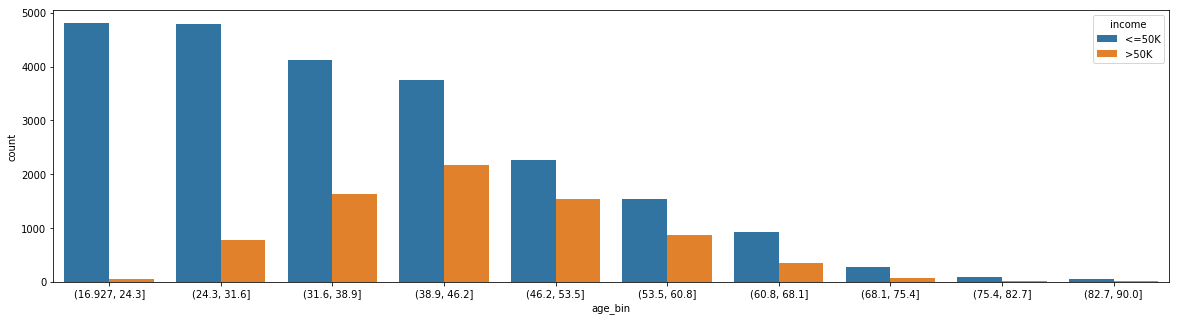

In [31]:
dfs = df_origin.copy()
# Dividing age into ranges
dfs['age_bin'] = pd.cut(dfs['age'], 10)

# Plotting count plot for age and income
fig = plt.figure(figsize=(20,5))
sns.countplot(x="age_bin", hue="income", data=dfs)

The above plot shows that experience matters to earn more income. More experienced people earn more than less experience people.

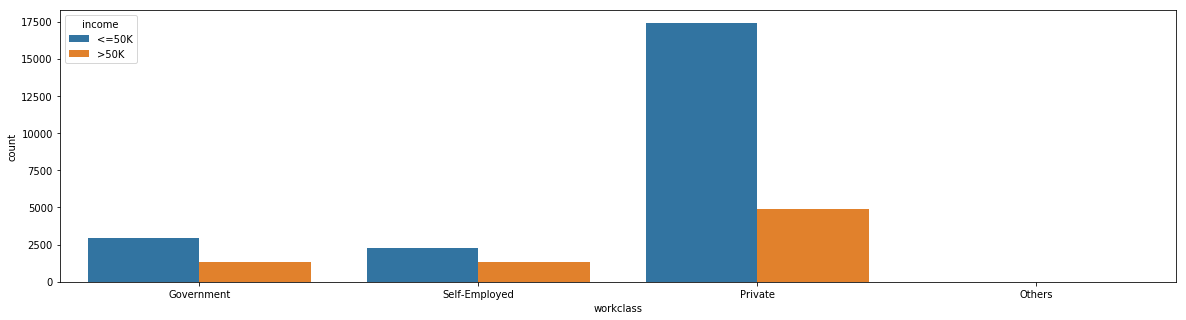

In [32]:
#Grouping working class
df['workclass'].replace('State-gov', 'Government',inplace=True)
df['workclass'].replace('Self-emp-not-inc', 'Self-Employed',inplace=True)
df['workclass'].replace('Private', 'Private',inplace=True)
df['workclass'].replace('Federal-gov', 'Government',inplace=True)
df['workclass'].replace('Local-gov', 'Government',inplace=True)
df['workclass'].replace('Self-emp-inc', 'Self-Employed',inplace=True)
df['workclass'].replace('Without-pay', 'Others',inplace=True)

# Plotting count plot for working-class and income
fig = plt.figure(figsize=(20,5))
sns.countplot(x="workclass", hue="income", data=df)

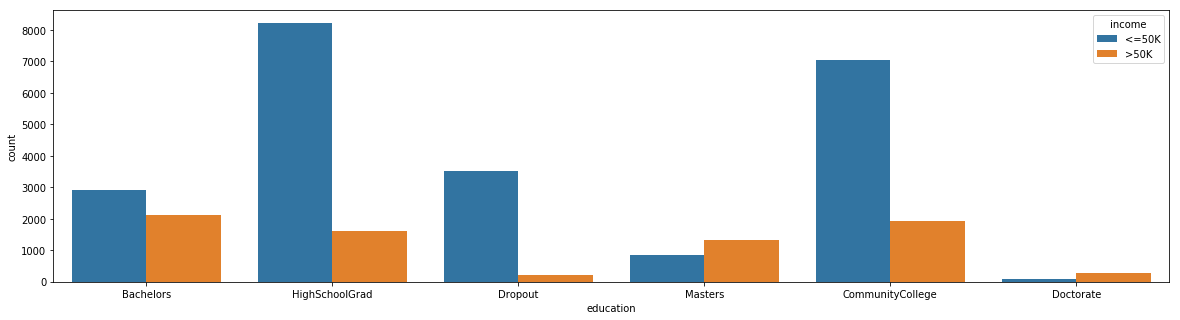

In [33]:
# Plotting count plot for education and income
fig = plt.figure(figsize=(20,5))
sns.countplot(x="education", hue="income", data=df)

This result is more expected. Higher the education level, higher you earn. The above plot justifies that.

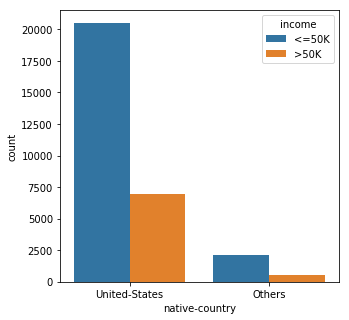

In [34]:
# Plotting count plot for native-country and income
fig = plt.figure(figsize=(5,5))
sns.countplot(x="native-country", hue="income", data=df)


The ratio of people with native-country as US earning more than 50k is lesser than the ratio for people with other native-origins. This result is kind of surprising

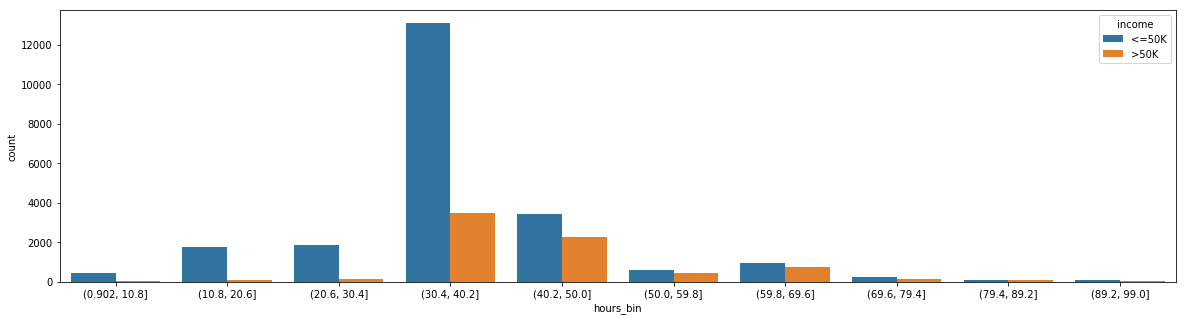

In [35]:
#Dividing hours per week into range values
dfs['hours_bin'] = pd.cut(dfs['hours-per-week'], 10)

# Plotting count plot for hours per week range and income
fig = plt.figure(figsize=(20,5))
sns.countplot(x="hours_bin", hue="income", data=dfs)

People on average work 30-40 hours a week, but if the person works more, the probability of the person getting paid >50k increases.

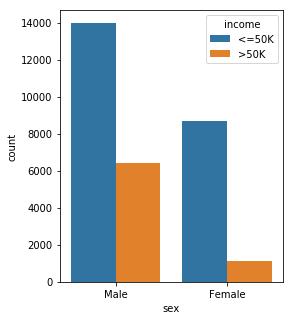

In [36]:

# Plotting count plot for Sex and income
fig = plt.figure(figsize=(4,5))
sns.countplot(x="sex", hue="income", data=df)

The ratio of males earning more than 50k is greater than the ratio of females earning more than 50k.

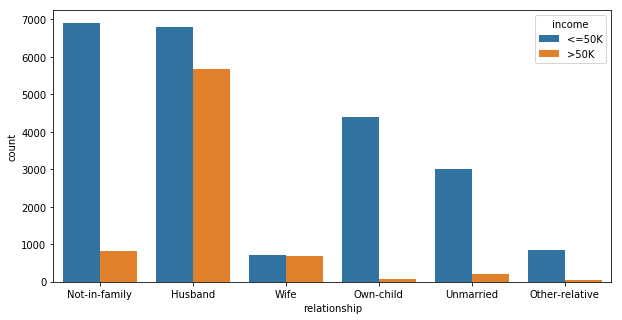

In [37]:
# Plotting count plot for relationship and income
fig = plt.figure(figsize=(10,5))
sns.countplot(x="relationship", hue="income", data=df)

In [38]:
y =pd.DataFrame( df['income'])
# remove income and fnlwgt features
del  df['income']


del  df['fnlwgt']
y.columns = ['income']
y.income.replace(['<=50K', '>50K'], [0, 1], inplace=True)

## Transformation

In [39]:
#one-hot-encoding
def one_hot_fun (df, col):
    one_hot = pd.get_dummies(df[col])
    df = df.drop(col,axis = 1)
    df = pd.concat([df, one_hot], axis=1)
    return df


In [40]:
scaler = MinMaxScaler()
def transform (X):
    X['capital-gain'] = X['capital-gain'].apply(lambda x: np.log(x+1))
    X['capital-loss'] = X['capital-loss'].apply(lambda x: np.log(x+1))
    scaling_columns =['capital-gain','capital-loss', 'age', 'education-num', 'hours-per-week']
    for n in scaling_columns:
        X[n] = scaler.fit_transform(X[n].values.reshape(-1, 1))
        X[n] = np.squeeze(X[n])
    one_hot_columns =['workclass','education', 'occupation', 'marital-status', 'relationship', 'race', 'sex', 'native-country']
    for n in one_hot_columns:
        X=one_hot_fun(X,n)
    return X

In [41]:
df=transform(df)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
     df, y, test_size=0.20, random_state=10)

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
model.score(X_train, y_train)

0.8397364167599155

In [45]:
model.score(X_test, y_test)

0.8398806563898558

In [46]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [47]:
clf.score(X_train, y_train)

0.8715238924116209

In [48]:
clf.score(X_test, y_test)

0.8209845847836897

In [49]:
len(df.columns)

48

In [50]:
from sklearn import tree
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
decision_tree = tree.DecisionTreeClassifier()
# Creating the hyperparameter grid  
param_dist = {"max_depth": range(10,100), 
              "max_features": randint(10, 48), 
              "min_samples_leaf": randint(5, 30), 
              "criterion": ["gini", "entropy"]} 
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(decision_tree, param_dist, cv = 5) 

tree_cv.fit(X_train, y_train)    

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': range(10, 100), 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022DEFC147B8>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022DEFC2E6D8>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [51]:
tree_cv.score(X_train, y_train)

0.8687057068258113

In [52]:
tree_cv.score(X_test, y_test)

0.8513177523620089

In [53]:
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 34, 'max_features': 26, 'min_samples_leaf': 18}
Best score is 0.8505532761407435
